In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import os
import glob
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, plot_roc_curve
import statsmodels.api as sm
# pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier  
# !pip install graphviz
# !pip install pydotplus
# conda install graphviz
from six import StringIO
from sklearn import metrics

# # Data Preparation

### 1. Data Creation

#### # Creating empty main csv file with all features name

In [2]:
df_main1 = pd.DataFrame(columns = ['name' ,'activity' ,'weight', 'duration','start_time' ,'change_in_load', 'variance',  'maximum', 'median', 'skewness', 'kurtosis', '0.9_quantile', 'acceleration', 'jerk', 'velocity', 'energy', 'power', 'momentum'])
df_main1

,name,activity,weight,duration,start_time,change_in_load,variance,maximum,median,skewness,kurtosis,0.9_quantile,acceleration,jerk,velocity,energy,power,momentum


#### # Creating a function of value incertion in main csv file

In [3]:
def value_insertion(loc_csv):
    df=pd.read_csv(loc_csv)
#     print(loc_csv)   # Print this if you want to track which folder is running while running the code
    df_main1.loc[len(df_main1.index)] = [df['name'][0], df['activity'][0], df['weight'][0], df['timestamp'][len(df)-1], df['start_time'][0], df['diff_load_sum'].mean(), df['diff_load_sum'].var(), df['diff_load_sum'].max(), df['diff_load_sum'].median(), df['diff_load_sum'].skew(), df['diff_load_sum'].kurtosis(), df['diff_load_sum'].quantile(0.9), df['acc'].mean(), df['jerk'].mean(), df['velo'].mean(), df['enr'].mean(), df['power'].mean(), df['mom'].mean()]
    return df_main1

#### # Creating a list with all folder's name

In [4]:
rootdir = "D:/Ajit/pip/sample_labeled9"
folder_list = []
for subdir, dirs, files in os.walk(rootdir):
    folder_list.append(subdir)
del folder_list[0]

#### # Value insertion in main csv file

In [5]:
i=0
for folder in folder_list:
    path=folder
    for filename in os.listdir(path):
        x=path+'/'+filename
#         print(i)    # Print this if you want to track which folder is running while running the code
        value_insertion(x)
        i+=1

In [237]:
# Taking backup of loaded dataset as 'df_main1'
df_main=df_main1.copy()

In [238]:
df_main.columns

Index(['name', 'activity', 'weight', 'duration', 'start_time',
       'change_in_load', 'variance', 'maximum', 'median', 'skewness',
       'kurtosis', '0.9_quantile', 'acceleration', 'jerk', 'velocity',
       'energy', 'power', 'momentum'],
      dtype='object')

#### # Rows with only 'Urination' and 'Defication'

In [239]:
df_main=df_main[df_main['activity']!='non_elimination']

In [240]:
df_main.shape

(8929, 18)

### 2. Data cleaning and Outlier removal

In [241]:
# Replacing NaN Name as 'unknown'
df_main['name'].fillna('unknown',inplace=True)

# Dropping NaN Rows 
df_main.dropna(inplace=True)

# Dropping rows with weight less than 1kg and more than 8kg
df_main=df_main[(df_main['weight']>1000) & (df_main['weight']<8000)]

# Activity "duration" 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['duration']>450))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['duration']>400))]

# "Change in load" 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['change_in_load']>1.8))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['change_in_load']>1.5))]

# 'Variance' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['variance']>8))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['variance']>7))]

# 'Skewness' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['skewness']>10))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['skewness']>12))]

# 'Acceleration' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['acceleration']>0.41))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['acceleration']>0.34))]

# 'Jerk' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['jerk']>7))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['jerk']>5.8))]

# 'Velocity'
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['velocity']>45))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['velocity']>34))]

# 'Energy' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['energy']>5000))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['energy']>3000))]

# 'Power' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['power']>47))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['power']>27))]

# 'Momentum' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['momentum']>195))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['momentum']>135))]

df_main=df_main[~((df_main['activity']=='defecation') & (df_main['energy']>4500))]

df_main.shape

(8785, 18)

### 3. Final Data (Removing Non numeric Columns )

In [242]:
# Onehot encoding
df_main=pd.get_dummies(df_main, columns=['activity'])

# Droping non numeric columns
df_main.drop(['name', 'start_time', 'activity_defecation'],axis=1,inplace=True)
df_main.head()

,weight,duration,change_in_load,variance,maximum,median,skewness,kurtosis,0.9_quantile,acceleration,jerk,velocity,energy,power,momentum,activity_urination
0,6933,163.975000,1.114670,2.425972,14.11659,0.43164,2.088879,5.125106,3.23730,0.160777,2.623752,18.629980,1422.404601,14.699895,129.161654,0
1,6451,204.774940,0.996088,2.262248,19.98297,0.32373,2.502551,9.150935,3.06072,0.154408,2.854197,20.030623,1626.238512,15.753942,129.217548,0
2,7240,59.975000,0.292591,0.218968,4.16925,0.05886,2.892435,11.742110,0.87309,0.040413,0.638543,1.792097,13.463229,0.355113,12.974780,0
3,7124,156.775000,0.952895,2.215583,12.43908,0.23544,2.385345,6.859419,2.95281,0.133758,2.379447,14.293334,898.360000,9.996573,101.825709,0
4,7150,183.974939,1.174555,3.997131,15.75486,0.14715,2.486553,7.492540,3.96324,0.164273,2.929181,21.458935,2029.562636,17.758225,153.431382,0


### 4. Upsampling

In [243]:
df_majority = df_main[df_main.activity_urination==1]
df_minority = df_main[df_main.activity_urination==0]

df_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=0)

df_main = pd.concat([df_majority, df_upsampled])

# # Feature selection using Backward Elimination

### step 1: Data splitting to train, test and validation

In [244]:
df_shuffeled=df_main.sample(frac=1,random_state=101)

df_train=df_shuffeled[:int(len(df_shuffeled)*0.6)]
df_validate=df_shuffeled[int(len(df_shuffeled)*.6):int(len(df_shuffeled)*0.8)]
df_test=df_shuffeled[int(len(df_shuffeled)*0.8):]


x_train = df_train.drop(columns='activity_urination')
y_train = df_train['activity_urination']

x_validate = df_validate.drop(columns='activity_urination')
y_validate = df_validate['activity_urination']

x_test = df_test.drop(columns='activity_urination')
y_test = df_test['activity_urination']

### step 2: Performance of Training, Validation and Test set using Logistic Regression 

In [245]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, log_reg.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

In [246]:
# Training model with logistic regression
log_reg = LogisticRegression(random_state=10)
log_reg.fit(x_train, y_train)

# Performance of Training Set
print('\nTraining\n--------------------------')
y_train_pred=log_reg.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)

# Performance of Validation Set
print('\nValidation\n--------------------------')
y_validate_pred=log_reg.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)

# Performance of Test set
print('\nTesting\n--------------------------')
y_test_pred=log_reg.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)


Training
--------------------------
Accuracy %age: 79.77
ROC-AUC Score: 0.87

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3938
           1       0.79      0.82      0.80      3898

    accuracy                           0.80      7836
   macro avg       0.80      0.80      0.80      7836
weighted avg       0.80      0.80      0.80      7836


Confusion Matrix: 
[[3074  864]
 [ 721 3177]]

Validation
--------------------------
Accuracy %age: 79.75
ROC-AUC Score: 0.87

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1315
           1       0.80      0.79      0.80      1297

    accuracy                           0.80      2612
   macro avg       0.80      0.80      0.80      2612
weighted avg       0.80      0.80      0.80      2612


Confusion Matrix: 
[[1054  261]
 [ 268 1029]]

Testing
--------------------------
Accuracy

C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'Done'

### Step 3: Features coefficient and P-Value evaluation and dropping feature with maximum p val if p-val > 0.05

In [247]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2596
Method:                           MLE   Df Model:                           15
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        00:03:22   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5274      1.222      1.250      0.211      -0.867       3.922
weight             0.0002      0.000      1.143      0.253      -0.000       0.000
duration          -0.0111      0.003     -3.925      0.000      -0.017      -0.006
change_in_load     7.7287      3.132      2.468      0.014       1.591      13.866
variance           0.1194      0.270      0.442      0.658      -0.409       0.648
maximum           -0.0312      0.028     -1.111      0.266      -0.086       0.024
median            -3.7890      1.573     -2.408      0.016      -6.873      -0.705
skewness           0.1700      0.271      0.627      0.531      -0.362       0.701
kurtosis        8.132e-05      0.015      0.005      0.996      -0.030       0.030
0.9_quantile      -1.1628      0.736     -1.580      0.114      -2.605       0.280
acceleration      28.7380     10.090      2.848      0.004       8.963      48.513
jerk              -1.1474      0.242     -4.746      0.000      -1.621      -0.674
velocity          -0.0946      0.080     -1.188      0.235      -0.251       0.061
energy             0.0052      0.001      9.815      0.000       0.004       0.006
power             -0.5491      0.069     -8.005      0.000      -0.684      -0.415
momentum          -0.0442      0.017     -2.537      0.011      -0.078      -0.010
==================================================================================
"""

#### Droping the feature with maximum p-value  ("kurtosis")

In [248]:
x_test.drop(['kurtosis'],axis=1,inplace=True)

#### Again Calculating P-value of all features 

In [249]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2597
Method:                           MLE   Df Model:                           14
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        00:03:24   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5232      0.934      1.630      0.103      -0.308       3.355
weight             0.0002      0.000      1.145      0.252      -0.000       0.000
duration          -0.0111      0.003     -3.929      0.000      -0.017      -0.006
change_in_load     7.7265      3.104      2.489      0.013       1.643      13.810
variance           0.1188      0.251      0.474      0.636      -0.373       0.610
maximum           -0.0312      0.028     -1.112      0.266      -0.086       0.024
median            -3.7870      1.529     -2.477      0.013      -6.784      -0.790
skewness           0.1713      0.082      2.087      0.037       0.010       0.332
0.9_quantile      -1.1613      0.684     -1.698      0.090      -2.502       0.179
acceleration      28.7402     10.082      2.851      0.004       8.980      48.500
jerk              -1.1474      0.241     -4.751      0.000      -1.621      -0.674
velocity          -0.0946      0.080     -1.189      0.234      -0.250       0.061
energy             0.0052      0.001      9.818      0.000       0.004       0.006
power             -0.5491      0.068     -8.126      0.000      -0.682      -0.417
momentum          -0.0442      0.017     -2.538      0.011      -0.078      -0.010
==================================================================================
"""

#### Droping the feature with maximum p-value  (variance)

In [250]:
x_test.drop(['variance'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [251]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2598
Method:                           MLE   Df Model:                           13
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        00:03:25   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4453      0.919      1.572      0.116      -0.356       3.247
weight             0.0002      0.000      1.092      0.275      -0.000       0.000
duration          -0.0111      0.003     -3.915      0.000      -0.017      -0.006
change_in_load     8.2609      2.892      2.856      0.004       2.593      13.929
maximum           -0.0284      0.027     -1.033      0.302      -0.082       0.025
median            -4.1675      1.304     -3.197      0.001      -6.722      -1.613
skewness           0.1802      0.080      2.254      0.024       0.023       0.337
0.9_quantile      -1.1654      0.684     -1.704      0.088      -2.506       0.175
acceleration      27.8659      9.883      2.819      0.005       8.495      47.237
jerk              -1.1140      0.231     -4.832      0.000      -1.566      -0.662
velocity          -0.0996      0.079     -1.259      0.208      -0.255       0.055
energy             0.0052      0.001      9.928      0.000       0.004       0.006
power             -0.5453      0.067     -8.145      0.000      -0.677      -0.414
momentum          -0.0445      0.017     -2.549      0.011      -0.079      -0.010
==================================================================================
"""

#### Droping the feature with maximum p-value  (maximum)

In [252]:
x_test.drop(['maximum'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [253]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2599
Method:                           MLE   Df Model:                           12
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        00:03:27   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7475      0.870      2.008      0.045       0.042       3.453
weight             0.0001      0.000      0.981      0.327      -0.000       0.000
duration          -0.0110      0.003     -3.919      0.000      -0.017      -0.006
change_in_load     7.8954      2.868      2.753      0.006       2.273      13.517
median            -3.8954      1.276     -3.053      0.002      -6.397      -1.394
skewness           0.1246      0.059      2.126      0.033       0.010       0.239
0.9_quantile      -1.2284      0.681     -1.803      0.071      -2.564       0.107
acceleration      29.2590      9.810      2.983      0.003      10.033      48.485
jerk              -1.2025      0.214     -5.617      0.000      -1.622      -0.783
velocity          -0.1070      0.079     -1.347      0.178      -0.263       0.049
energy             0.0053      0.001     10.092      0.000       0.004       0.006
power             -0.5475      0.067     -8.204      0.000      -0.678      -0.417
momentum          -0.0445      0.018     -2.533      0.011      -0.079      -0.010
==================================================================================
"""

#### Droping the feature with maximum p-value  (weight)

In [254]:
x_test.drop(['weight'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [255]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2600
Method:                           MLE   Df Model:                           11
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        00:03:29   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.3843      0.584      4.085      0.000       1.240       3.528
duration          -0.0108      0.003     -3.851      0.000      -0.016      -0.005
change_in_load     8.8403      2.697      3.278      0.001       3.554      14.126
median            -3.9185      1.275     -3.074      0.002      -6.417      -1.420
skewness           0.1222      0.058      2.091      0.037       0.008       0.237
0.9_quantile      -1.1991      0.679     -1.767      0.077      -2.529       0.131
acceleration      25.2358      8.820      2.861      0.004       7.950      42.522
jerk              -1.2064      0.212     -5.678      0.000      -1.623      -0.790
velocity          -0.1188      0.079     -1.506      0.132      -0.273       0.036
energy             0.0053      0.001     10.106      0.000       0.004       0.006
power             -0.5566      0.066     -8.385      0.000      -0.687      -0.427
momentum          -0.0423      0.018     -2.408      0.016      -0.077      -0.008
==================================================================================
"""

#### Droping the feature with maximum p-value  (velocity)

In [256]:
x_test.drop(['velocity'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [257]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2601
Method:                           MLE   Df Model:                           10
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        00:03:30   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4053      0.585      4.113      0.000       1.259       3.552
duration          -0.0117      0.003     -4.278      0.000      -0.017      -0.006
change_in_load    10.4739      2.470      4.240      0.000       5.633      15.315
median            -3.7134      1.267     -2.932      0.003      -6.196      -1.231
skewness           0.1295      0.058      2.225      0.026       0.015       0.244
0.9_quantile      -1.1248      0.677     -1.662      0.096      -2.451       0.202
acceleration      14.8262      5.310      2.792      0.005       4.418      25.234
jerk              -1.1653      0.208     -5.594      0.000      -1.574      -0.757
energy             0.0052      0.001     10.049      0.000       0.004       0.006
power             -0.5581      0.066     -8.394      0.000      -0.688      -0.428
momentum          -0.0630      0.011     -5.830      0.000      -0.084      -0.042
==================================================================================
"""

#### Droping the feature with maximum p-value  (0.9_quantile)

In [258]:
x_test.drop(['0.9_quantile'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [259]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2602
Method:                           MLE   Df Model:                            9
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        00:03:32   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.1052      0.558      3.774      0.000       1.012       3.199
duration          -0.0115      0.003     -4.208      0.000      -0.017      -0.006
change_in_load     6.8253      1.113      6.133      0.000       4.644       9.006
median            -1.9971      0.729     -2.741      0.006      -3.425      -0.569
skewness           0.1854      0.048      3.882      0.000       0.092       0.279
acceleration      18.3485      4.941      3.714      0.000       8.665      28.032
jerk              -1.3530      0.178     -7.620      0.000      -1.701      -1.005
energy             0.0051      0.001      9.937      0.000       0.004       0.006
power             -0.5477      0.066     -8.283      0.000      -0.677      -0.418
momentum          -0.0627      0.011     -5.818      0.000      -0.084      -0.042
==================================================================================
"""

#### Now all the features has p-val < 0.05

In [260]:
x_test.columns

Index(['duration', 'change_in_load', 'median', 'skewness', 'acceleration',
       'jerk', 'energy', 'power', 'momentum'],
      dtype='object')

#### Final features are  1. duration,  2. change_in_load, 3. median, 4. skewness,  5. jerk, 6. energy,  8. power, 9. momentum

# # Modelling

### # Final data

In [261]:
df_main_final=df_main.copy()

In [262]:
# Dropping columns from as a result of Backward Elimination:
df_main_final.drop(['kurtosis','variance','maximum','velocity','0.9_quantile'],axis=1,inplace=True)

# Dropping 'Weight' column as there are no variation shown across activities in boxplot of final EDA
df_main_final.drop(['weight'],axis=1,inplace=True)

In [263]:
df_shuffeled=df_main_final.sample(frac=1,random_state=101)

df_train=df_shuffeled[:int(len(df_shuffeled)*0.6)]
df_validate=df_shuffeled[int(len(df_shuffeled)*.6):int(len(df_shuffeled)*0.8)]
df_test=df_shuffeled[int(len(df_shuffeled)*0.8):]


x_train = df_train.drop(columns='activity_urination')
y_train = df_train['activity_urination']

x_validate = df_validate.drop(columns='activity_urination')
y_validate = df_validate['activity_urination']

x_test = df_test.drop(columns='activity_urination')
y_test = df_test['activity_urination']

### 1. Modelling with Logistic Regression:

#### i. Training Data

In [264]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, log_reg.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'


Training
--------------------------
Accuracy %age: 80.54
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3938
           1       0.79      0.83      0.81      3898

    accuracy                           0.81      7836
   macro avg       0.81      0.81      0.81      7836
weighted avg       0.81      0.81      0.81      7836


Confusion Matrix: 
[[3085  853]
 [ 672 3226]]

 ROC-AUC Curve for training set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


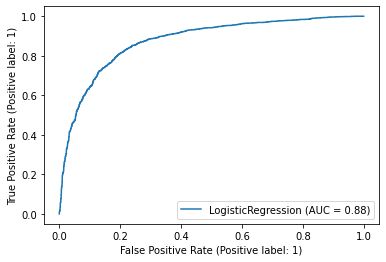

In [265]:
log_reg = LogisticRegression(random_state=10)
log_reg.fit(x_train, y_train)

print('\nTraining\n--------------------------')
y_train_pred=log_reg.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
print('\n ROC-AUC Curve for training set')
plot_roc_curve(log_reg, x_train, y_train)
plt.show()

#### ii. Validation Data


Validation
--------------------------
Accuracy %age: 79.82
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1315
           1       0.79      0.80      0.80      1297

    accuracy                           0.80      2612
   macro avg       0.80      0.80      0.80      2612
weighted avg       0.80      0.80      0.80      2612


Confusion Matrix: 
[[1046  269]
 [ 258 1039]]

 ROC-AUC Curve for validate set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


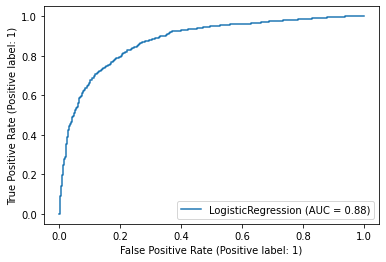

In [266]:
print('\nValidation\n--------------------------')
y_validate_pred=log_reg.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
print('\n ROC-AUC Curve for validate set')
plot_roc_curve(log_reg, x_validate, y_validate)
plt.show()

#### iii. Test Data


Testing
--------------------------
Accuracy %age: 80.55
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1277
           1       0.80      0.83      0.81      1335

    accuracy                           0.81      2612
   macro avg       0.81      0.80      0.81      2612
weighted avg       0.81      0.81      0.81      2612


Confusion Matrix: 
[[ 991  286]
 [ 222 1113]]

 ROC-AUC Curve for test set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


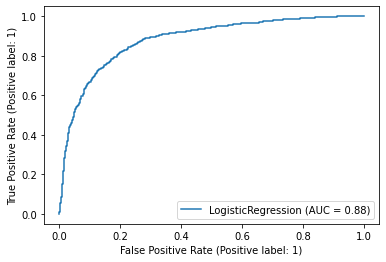

In [267]:
print('\nTesting\n--------------------------')
y_test_pred=log_reg.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
print('\n ROC-AUC Curve for test set')
plot_roc_curve(log_reg, x_test, y_test)
plt.show()

#### # Threshold = 0.4
#### False negetive has decreased & Recall of positive class has increased


Testing
--------------------------
Accuracy %age: 80.44
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1277
           1       0.77      0.89      0.82      1335

    accuracy                           0.80      2612
   macro avg       0.81      0.80      0.80      2612
weighted avg       0.81      0.80      0.80      2612


Confusion Matrix: 
[[ 915  362]
 [ 149 1186]]

 ROC-AUC Curve for test set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


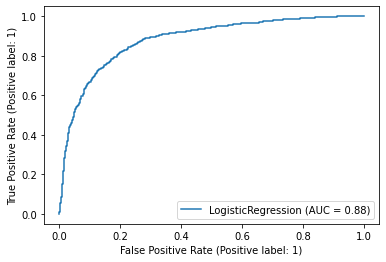

In [268]:
log_reg = LogisticRegression(random_state=10)
log_reg.fit(x_train, y_train)
print('\nTesting\n--------------------------')
y_test_probability = log_reg.predict_proba(x_test)[:,1]
y_test_pred=np.where(y_test_probability >= 0.4, 1, 0)
error_metrics(y_test, y_test_pred, x_test)
print('\n ROC-AUC Curve for test set')
plot_roc_curve(log_reg, x_test, y_test)
plt.show()

#### # Threshold = 0.6
#### False positive has decreased & Recall of negetice class has decreased


Testing
--------------------------
Accuracy %age: 80.25
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1277
           1       0.84      0.76      0.80      1335

    accuracy                           0.80      2612
   macro avg       0.81      0.80      0.80      2612
weighted avg       0.81      0.80      0.80      2612


Confusion Matrix: 
[[1088  189]
 [ 327 1008]]

 ROC-AUC Curve for test set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


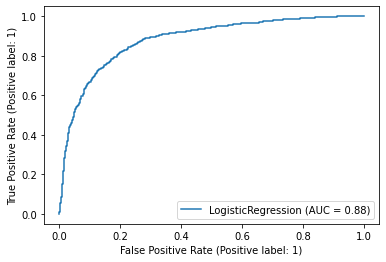

In [269]:
log_reg = LogisticRegression(random_state=10)
log_reg.fit(x_train, y_train)
print('\nTesting\n--------------------------')
y_test_probability = log_reg.predict_proba(x_test)[:,1]
y_test_pred=np.where(y_test_probability >= 0.6, 1, 0)
error_metrics(y_test, y_test_pred, x_test)
print('\n ROC-AUC Curve for test set')
plot_roc_curve(log_reg, x_test, y_test)
plt.show()

### 2. Modelling with XG Boost

In [44]:
xgb_weighted = XGBClassifier(verbsity=0, random_state=3)
grid_list={'nthread':[4], 'objective':['binary:logistic'], 'learning_rate':[0.001, 0.01, 0.03], 
           'max_depth':[5,6,7], 'min_child_weight':[3,4], 'silent':[1],
           'subsample':[0.7], 'colsample_bytree':[0.7],'n_estimators':[100]}
xgb_grid_search = GridSearchCV(estimator=xgb_weighted, param_grid=grid_list, cv=10, n_jobs=4, verbose=False, scoring='roc_auc')
xgb_grid_search.fit(x_train, y_train)
xgb_best_model = xgb_grid_search.best_estimator_

[13:23:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "verbsity" } are not used.



In [45]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, xgb_grid_search.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### i. Train Set


Training
--------------------------
Accuracy %age: 88.73
ROC-AUC Score: 0.95

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3938
           1       0.91      0.86      0.88      3898

    accuracy                           0.89      7836
   macro avg       0.89      0.89      0.89      7836
weighted avg       0.89      0.89      0.89      7836


Confusion Matrix: 
[[3586  352]
 [ 531 3367]]

 ROC-AUC Curve for test set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


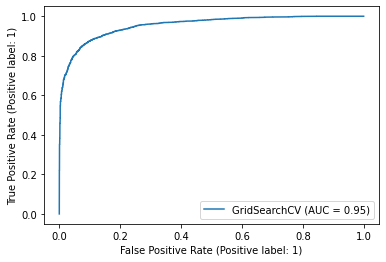

In [46]:
print('\nTraining\n--------------------------')
y_train_pred=xgb_best_model.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
print('\n ROC-AUC Curve for test set')
plot_roc_curve(xgb_grid_search, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 84.42
ROC-AUC Score: 0.92

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1315
           1       0.87      0.81      0.84      1297

    accuracy                           0.84      2612
   macro avg       0.85      0.84      0.84      2612
weighted avg       0.85      0.84      0.84      2612


Confusion Matrix: 
[[1152  163]
 [ 244 1053]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


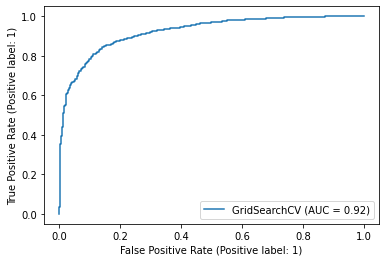

In [47]:
print('\nValidation\n--------------------------')
y_validate_pred=xgb_best_model.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(xgb_grid_search, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 85.87
ROC-AUC Score: 0.93

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1277
           1       0.88      0.84      0.86      1335

    accuracy                           0.86      2612
   macro avg       0.86      0.86      0.86      2612
weighted avg       0.86      0.86      0.86      2612


Confusion Matrix: 
[[1125  152]
 [ 217 1118]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


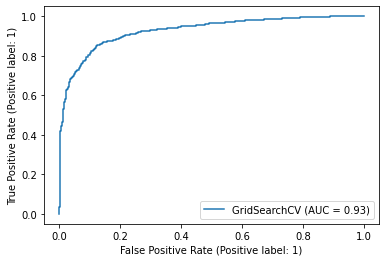

In [48]:
print('\nTesting\n--------------------------')
y_test_pred=xgb_best_model.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(xgb_grid_search, x_test, y_test)
plt.show()

#### # Feature Importance

In [50]:
xgb_imp_df = pd.DataFrame()
xgb_imp_df['Features'] = x_test.columns
xgb_imp_df['Importance'] = xgb_best_model.feature_importances_
xgb_imp_df = xgb_imp_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
xgb_imp_df

,Features,Importance
0,energy,0.373632
1,duration,0.113861
2,power,0.111053
3,jerk,0.103000
4,momentum,0.094217
5,median,0.084460
6,skewness,0.063976
7,change_in_load,0.055801


<AxesSubplot: xlabel='Importance', ylabel='Features'>

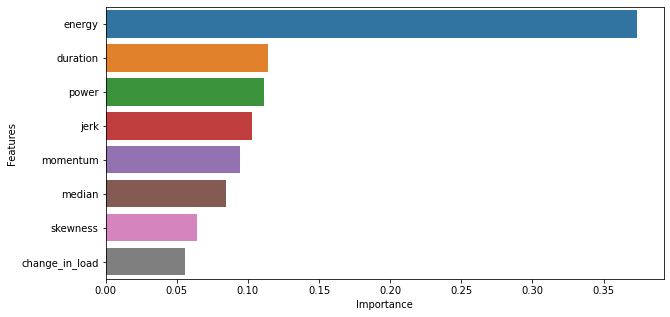

In [51]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Importance', y = 'Features', data = xgb_imp_df)

### 3. Modelling with SVM

In [290]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', probability=True) 
  
# fitting x samples and y classes 
classifier.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [291]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### i. Train Set


Training
--------------------------
Accuracy %age: 80.53
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3938
           1       0.79      0.83      0.81      3898

    accuracy                           0.81      7836
   macro avg       0.81      0.81      0.81      7836
weighted avg       0.81      0.81      0.81      7836


Confusion Matrix: 
[[3079  859]
 [ 667 3231]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


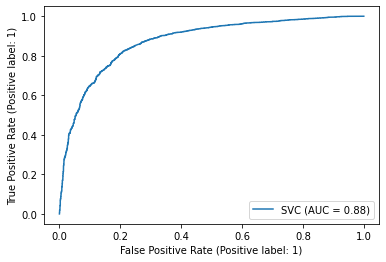

In [51]:
print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation set

In [41]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 80.78
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1277
           1       0.80      0.83      0.82      1335

    accuracy                           0.81      2612
   macro avg       0.81      0.81      0.81      2612
weighted avg       0.81      0.81      0.81      2612


Confusion Matrix: 
[[1003  274]
 [ 228 1107]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


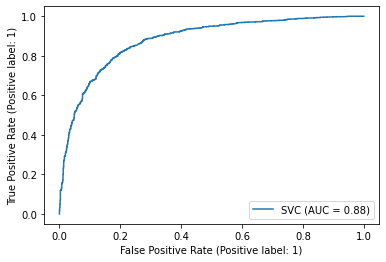

In [53]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

### 4. Modelling with KNN

In [270]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

In [271]:
classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

#### i. Train Set


Training
--------------------------
Accuracy %age: 83.07
ROC-AUC Score: 0.92

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      3938
           1       0.87      0.78      0.82      3898

    accuracy                           0.83      7836
   macro avg       0.83      0.83      0.83      7836
weighted avg       0.83      0.83      0.83      7836


Confusion Matrix: 
[[3464  474]
 [ 853 3045]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


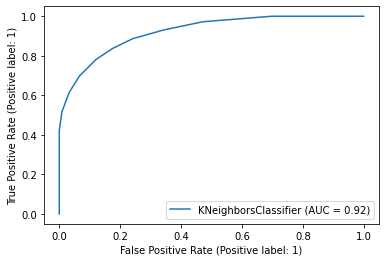

In [272]:
print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 79.25
ROC-AUC Score: 0.87

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.85      0.81      1315
           1       0.83      0.73      0.78      1297

    accuracy                           0.79      2612
   macro avg       0.80      0.79      0.79      2612
weighted avg       0.80      0.79      0.79      2612


Confusion Matrix: 
[[1123  192]
 [ 350  947]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


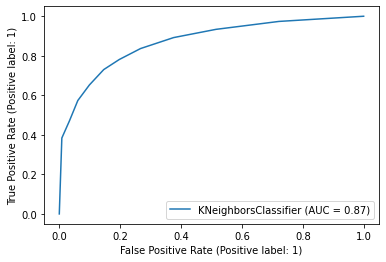

In [273]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 79.52
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1277
           1       0.84      0.74      0.79      1335

    accuracy                           0.80      2612
   macro avg       0.80      0.80      0.79      2612
weighted avg       0.80      0.80      0.79      2612


Confusion Matrix: 
[[1084  193]
 [ 342  993]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


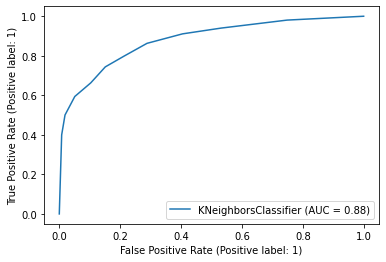

In [274]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

### 3. Modelling with Decision Tree

In [275]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### i. Training Set


Training
--------------------------
Accuracy %age: 93.26
ROC-AUC Score: 0.98

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3938
           1       0.96      0.90      0.93      3898

    accuracy                           0.93      7836
   macro avg       0.93      0.93      0.93      7836
weighted avg       0.93      0.93      0.93      7836


Confusion Matrix: 
[[3790  148]
 [ 380 3518]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


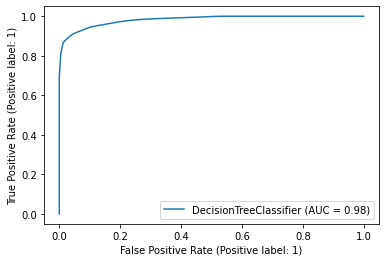

In [276]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth =12, random_state=10)
classifier.fit(x_train, y_train)

print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 85.45
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1315
           1       0.91      0.78      0.84      1297

    accuracy                           0.85      2612
   macro avg       0.86      0.85      0.85      2612
weighted avg       0.86      0.85      0.85      2612


Confusion Matrix: 
[[1219   96]
 [ 284 1013]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


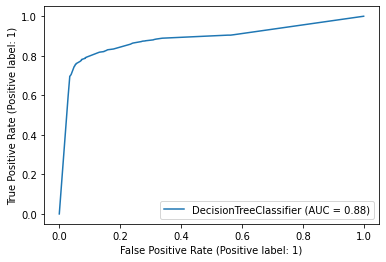

In [277]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 85.64
ROC-AUC Score: 0.89

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1277
           1       0.91      0.80      0.85      1335

    accuracy                           0.86      2612
   macro avg       0.86      0.86      0.86      2612
weighted avg       0.86      0.86      0.86      2612


Confusion Matrix: 
[[1174  103]
 [ 272 1063]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


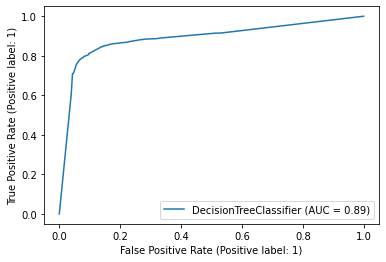

In [278]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

#### # Feature Importance

In [279]:
dt_df = pd.DataFrame()
dt_df['Features'] = x_test.columns
dt_df['Importance'] = classifier.feature_importances_
dt_df = dt_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
dt_df

,Features,Importance
0,energy,0.401986
1,jerk,0.114926
2,duration,0.105745
3,median,0.073745
4,skewness,0.066923
5,power,0.065122
6,momentum,0.064358
7,change_in_load,0.063984
8,acceleration,0.043212


<AxesSubplot: xlabel='Importance', ylabel='Features'>

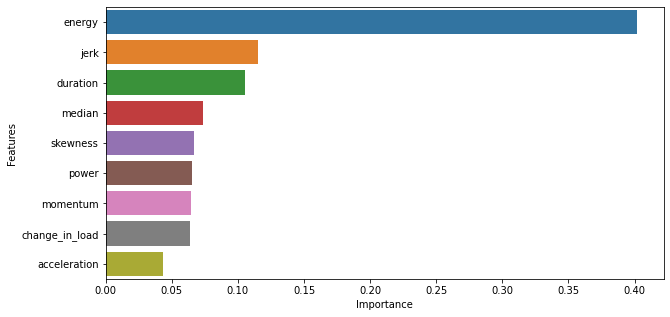

In [280]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Importance', y = 'Features', data = dt_df)

#### # Visualization of tree

In [281]:
x_train.columns

Index(['duration', 'change_in_load', 'median', 'skewness', 'acceleration',
       'jerk', 'energy', 'power', 'momentum'],
      dtype='object')

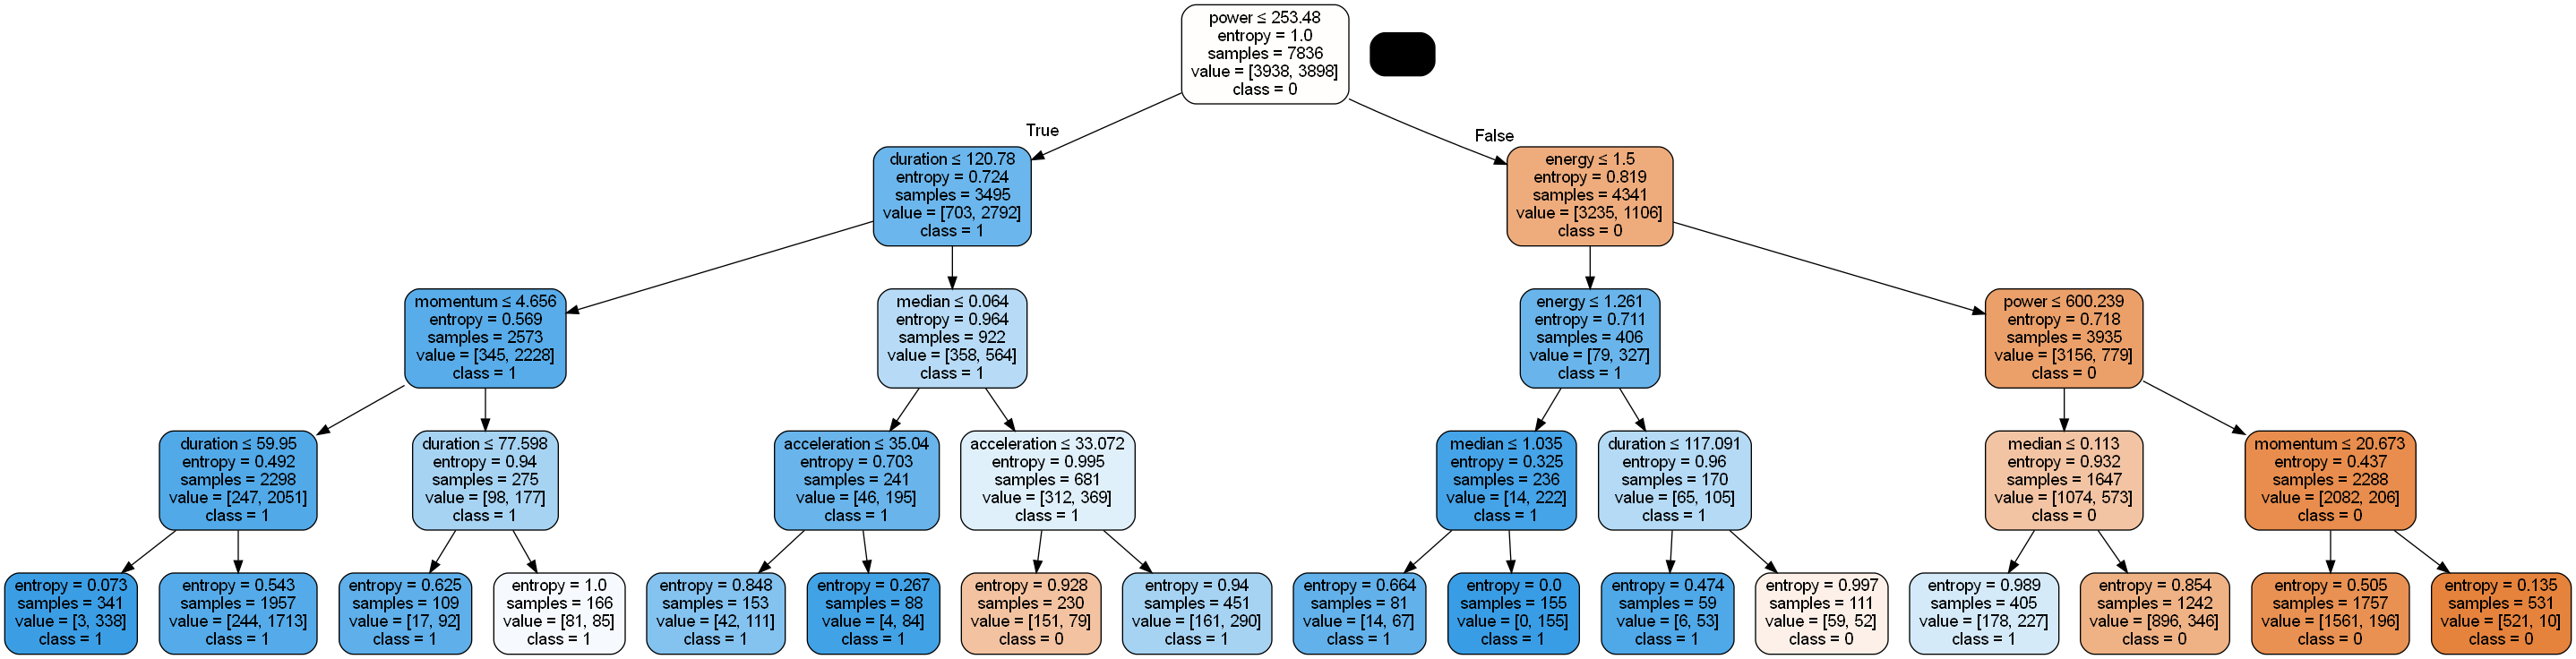

In [283]:
feature_cols=['duration', 'change_in_load', 'median', 'skewness', 'jerk', 'energy',
       'power', 'momentum','acceleration']

# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
classifier.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('main.jpg')
Image(graph.create_png())

### 4. Modelling with Random Forest

In [284]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### i. Training Set

## ***( As with this hyper parameter I am getting good Valodation and Test result, though Train result is coming 100%, I have used this hyper parameter for best model performance)


Training
--------------------------
Accuracy %age: 99.99
ROC-AUC Score: 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3938
           1       1.00      1.00      1.00      3898

    accuracy                           1.00      7836
   macro avg       1.00      1.00      1.00      7836
weighted avg       1.00      1.00      1.00      7836


Confusion Matrix: 
[[3937    1]
 [   0 3898]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


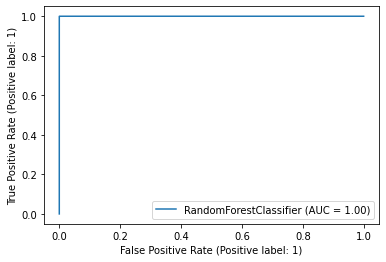

In [285]:
classifier = RandomForestClassifier(n_estimators=55, criterion='entropy',max_depth =35, random_state=10)
classifier.fit(x_train, y_train)

print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 91.16
ROC-AUC Score: 0.97

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1315
           1       0.96      0.86      0.91      1297

    accuracy                           0.91      2612
   macro avg       0.92      0.91      0.91      2612
weighted avg       0.92      0.91      0.91      2612


Confusion Matrix: 
[[1267   48]
 [ 183 1114]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


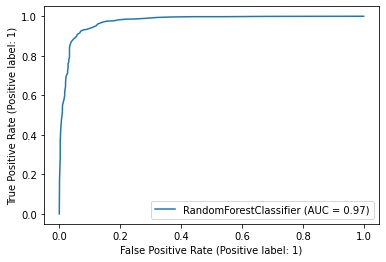

In [286]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 91.16
ROC-AUC Score: 0.97

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1277
           1       0.95      0.87      0.91      1335

    accuracy                           0.91      2612
   macro avg       0.91      0.91      0.91      2612
weighted avg       0.91      0.91      0.91      2612


Confusion Matrix: 
[[1216   61]
 [ 170 1165]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


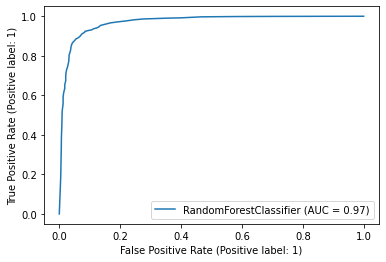

In [287]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

#### # Feature Importance

In [288]:
RF_df = pd.DataFrame()
RF_df['Features'] = x_test.columns
RF_df['Importance'] = classifier.feature_importances_
RF_df = RF_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
RF_df

,Features,Importance
0,energy,0.163581
1,duration,0.144656
2,momentum,0.138884
3,power,0.128892
4,jerk,0.119468
5,median,0.081242
6,change_in_load,0.078454
7,skewness,0.075762
8,acceleration,0.069062


<AxesSubplot: xlabel='Importance', ylabel='Features'>

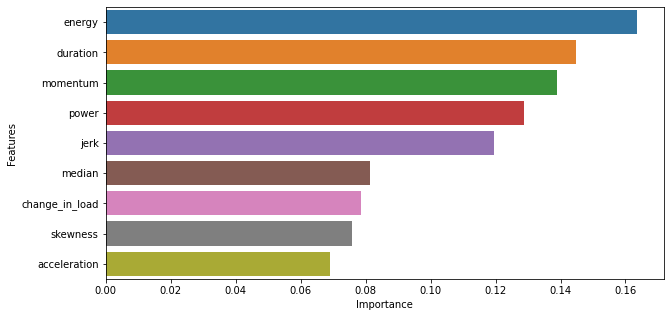

In [289]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Importance', y = 'Features', data = RF_df)

## PDP Plots (Partial Dependance Plot)

In [84]:
# PDP plot is not installing properly so, I am using seaborn to plot PDP plots

In [85]:
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)

In [86]:
classifier = RandomForestClassifier(n_estimators=41, criterion='entropy',max_depth =26, random_state=10)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=26, n_estimators=41,
                       random_state=10)

#### # Jerk

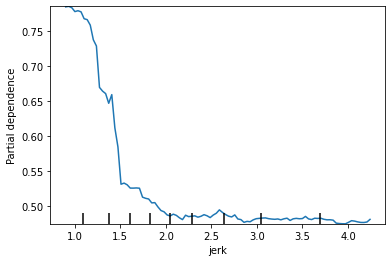

In [87]:
var = 'jerk'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Momentum

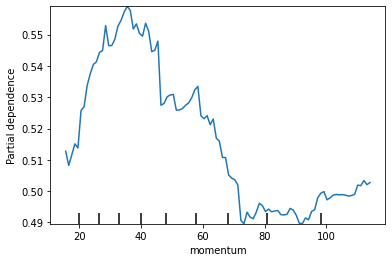

In [88]:
var = 'momentum'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Power

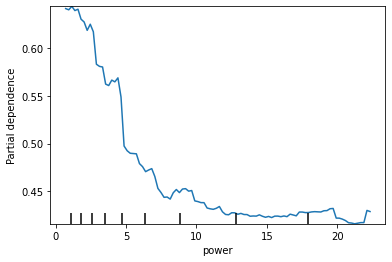

In [89]:
var = 'power'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Duratrion

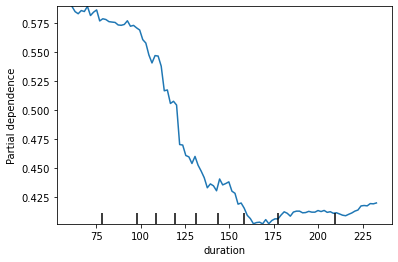

In [90]:
var = 'duration'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Change in load

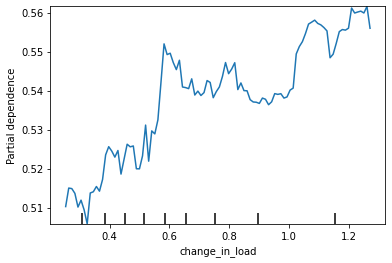

In [91]:
var = 'change_in_load'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Median

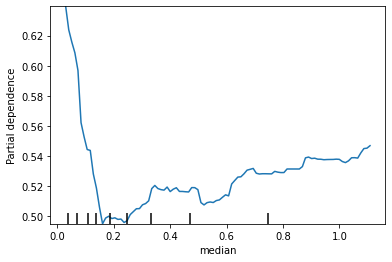

In [92]:
var = 'median'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Skewness

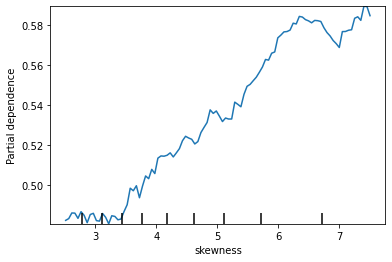

In [93]:
var = 'skewness'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

In [ ]:
# As the dataset has correlated columns so PDP (Partial Dependance Plots) will not show a good result. Alternative method is ALE (Accumulated Local Effects)